## Configuração do ambiente

A recuperação do corpus foi feita utilizando git no terminal

In [ ]:
%cd essay-br

D:\!pln\trab\essay-br


In [ ]:
!pip install -r requirements.txt

In [ ]:
%cd extended-corpus

D:\!pln\trab\essay-br\extended-corpus


In [ ]:
import pandas as pd

df_redacoes = pd.read_csv("extended_essay-br.csv")
df_temas = pd.read_csv("prompts.csv")

print("Redações:\n", df_redacoes.sample(n=20))
print("\nTemas:\n", df_temas.sample(n=20))

Redações:
       prompt                                              title  \
5973     112  Diminuição da maioridade penal é mesmo a solução?   
6323     134                              O poder emana do povo   
3880      15                                Corpo humano em dia   
2812      83                                    Esporte é saúde   
6473     144                                 Luta por Igualdade   
3052      83  O desenvolvimento atrelado as* práticas esport...   
6488     145                                    Copa para quem?   
5265      91      A doença do negacionismo científico no Brasil   
1411       9                              Educação é para todos   
3366      75                             O direito à autodefesa   
2727      49                o papel dos influenciadores digitas   
5729      96                              A Aids e seu contágio   
4879      87                                                NaN   
1965      82                         Problemas da a

In [ ]:
qtd_c1 = df_redacoes['c1'].count()
distribuicao_c1 = df_redacoes['c1'].value_counts().sort_index()

print(f"Quantidade de notas na competência 1: {qtd_c1}")
print("\nDistribuição das notas na competência 1:")
print(distribuicao_c1)

Quantidade de notas na competência 1: 6577

Distribuição das notas na competência 1:
c1
0       107
40       24
80      524
120    3145
160    2483
200     294
Name: count, dtype: int64


## Análise Ortográfica

Inicialmente, há a análise ortográfica das palavras do texto utilizando spellchecker

A função analise_ortografica() recebe um dataframe contendo redações a serem analisadas e retorna um dataframe contendo o texto analisado e a nota (de 0 a 5) associada com o texto.
Há um pré-processamento na função que transforma todas as letras em minúsculas e remove os sinais de pontuação, substituindo-os por espaços em branco.

In [ ]:
import pandas as pd
from spellchecker import SpellChecker
import random
import string

def limpar_pontuacao(texto):
    texto_limpo = str.maketrans({char: ' ' for char in string.punctuation})
    return texto.translate(texto_limpo)

def analise_ortografica(df):
    spell = SpellChecker(language='pt')  # Para português
    amostra = df['essay']

    resultados = []
    for texto in amostra:
        texto_limpo = limpar_pontuacao(texto.lower())
        palavras = texto_limpo.split()
        total = len(palavras)
        erros = spell.unknown(palavras)
        if total != 0:
            nota = 5 * (1 - len(erros)/total)
        else:
            nota = 0
        resultados.append({
            'texto': texto,
            'nota_ortografia': round(nota, 2)
        })

    return pd.DataFrame(resultados)

In [ ]:
df_total = pd.read_csv("extended_essay-br.csv")
amostra = df_total.dropna().sample(n=20)
analise_ortografica(amostra)

,texto,nota_ortografia
0,"['A violência vem crescendo cada vez mais, lev...",4.94
1,"['O trânsito está cada vez mais caótico, princ...",5.00
2,['Melhorar a educação sem valorizar o professo...,4.97
3,['Vimos recentemente o caso de uma mãe que des...,4.86
4,"[""Segundo declarou o líder sul - africano , Ne...",4.93
5,"['Há muito tempo,jornais,televisões e revistas...",4.94
6,['É instigante dizer que em pleno século XXI p...,4.83
7,['Devido ao processo de compressão espaço-temp...,4.93
8,['A demarcação de terras é um meio que deve se...,4.92
9,"['O virús ""A H1N1"" conhecido popularmente como...",4.70


## Análise Gramatical
A análise gramatical é feita utilizando language_tool_python.

In [ ]:
!pip instal language_tool_python

A célula a seguir deve ser executada apenas uma única vez durante a execução deste notebook.

In [ ]:
import language_tool_python
ferramenta = language_tool_python.LanguageTool('pt-BR')

A função analise_gramatical() recebe um dataframe contendo redações a serem analisadas e retorna um dataframe contendo o texto analisado e a nota (de 0 a 5) associada com o texto.

In [ ]:
import language_tool_python
import pandas as pd

def analise_gramatical(df):

    amostra = df['essay']
    resultados = []

    for texto in amostra:
        erros = ferramenta.check(texto)

        # Cálculo da nota: quanto menos erros, maior a nota
        total_palavras = len(texto.split())
        total_erros = len(erros)
        if total_palavras > 0:
            nota = 5 * (1 - total_erros/total_palavras)
        else:
            nota = 0

        resultados.append({
            'texto': texto,
            'nota_gramatical': round(nota, 2)
        })

    return pd.DataFrame(resultados)

In [ ]:
df_total = pd.read_csv("extended_essay-br.csv")
amostra = df_total.dropna().sample(n=5)
analise_gramatical(amostra)

,texto,nota_gramatical
0,"['Historicamente, a mulher vem sido colocada e...",4.74
1,"['No panorama atual, tem ganhado visibilidade ...",4.86
2,['Diz a história brasileira atestada e documen...,4.88
3,['Hoje a população indígena está cada vez meno...,4.57
4,['Ao descrever a personagem Iracema no livro d...,4.93


## Avaliação
Nessa etapa é feita o cálculo da nota da competência 1 baseado nas notas calculadas nas funções de análise ortográfica e gramatical

In [ ]:
import pandas as pd
from spellchecker import SpellChecker
import random
import string

def limpar_pontuacao(texto):
    texto_limpo = str.maketrans({char: ' ' for char in string.punctuation})
    return texto.translate(texto_limpo)

def analise_ortografica(df):
    spell = SpellChecker(language='pt')  # Para português
    amostra = df['essay']

    resultados = []
    for texto in amostra:
        texto_limpo = limpar_pontuacao(texto.lower())
        palavras = texto_limpo.split()
        total = len(palavras)
        erros = spell.unknown(palavras)
        if total != 0:
            nota = 5 * (1 - len(erros)/total)
        else:
            nota = 0
        resultados.append({
            'texto': texto,
            'nota_ortografia': round(nota, 2)
        })

    return pd.DataFrame(resultados)

def analise_gramatical(df):

    amostra = df['essay']
    resultados = []

    for texto in amostra:
        erros = ferramenta.check(texto)

        # Cálculo da nota: quanto menos erros, maior a nota
        total_palavras = len(texto.split())
        total_erros = len(erros)
        if total_palavras > 0:
            nota = 5 * (1 - total_erros/total_palavras)
        else:
            nota = 0

        resultados.append({
            'texto': texto,
            'nota_gramatical': round(nota, 2)
        })

    return pd.DataFrame(resultados)

A função analise_c1() recebe um dataframe contendo as redações e retorna um dataframe contendo o texto analisado, a nota associada à ortografia, a nota associada à gramática, a nota c1 calculada a partir das duas notas anteriores e a nota da competência 1 atribuída ao texto pelo corpus original

In [ ]:
def analise_c1(amostra):
    ortografia = analise_ortografica(amostra)
    gramatica = analise_gramatical(amostra)
    analise = pd.concat([ortografia, gramatica['nota_gramatical']], axis=1)
    analise['c1_calculada'] = round(((round((analise['nota_ortografia']+analise['nota_gramatical']) / 2, 2) - 4.25) / 0.75) * 5, 0) * 40
    analise.loc[analise['c1_calculada'] < 0] = 0
    analise['c1'] = amostra['c1'].values
    #resultados = pd.concat([analise, amostra['c1']], axis=1)
    return analise

In [ ]:
df_total = pd.read_csv("extended_essay-br.csv")
amostra = df_total.dropna().sample(n=20)
analise_c1(amostra)

,texto,nota_ortografia,nota_gramatical,c1_calculada,c1
0,['É indiscutível que a prática esportiva é uma...,4.88,4.97,160.0,160
1,['Os índices de violência nos grandes centros ...,4.91,4.95,200.0,120
2,['É notório que a reforma do ensino médio no B...,4.84,4.80,160.0,80
3,['Na era em que vivemos o número cada vez mai...,4.82,4.88,160.0,120
4,"['Sem dúvidas nenhuma, a homossexualidade nunc...",4.96,4.93,200.0,120
5,['“Uma barragem da mineradora Vale se rompe em...,4.79,4.83,160.0,120
6,['Existem varios tipos de preconceito. Isso ve...,4.82,4.74,160.0,160
7,['Na novela “A força do querer” levanta a tese...,4.81,4.85,160.0,160
8,['Isaac Newton foi um cientista inglês que dis...,4.81,4.95,160.0,160
9,"['""Toda pessoa tem direito a um nível de vida ...",4.87,4.82,160.0,160


In [ ]:
df_total = pd.read_csv("extended_essay-br.csv")
#amostra = df_total.dropna().sample(n=200)
dados = analise_c1(df_total.dropna())

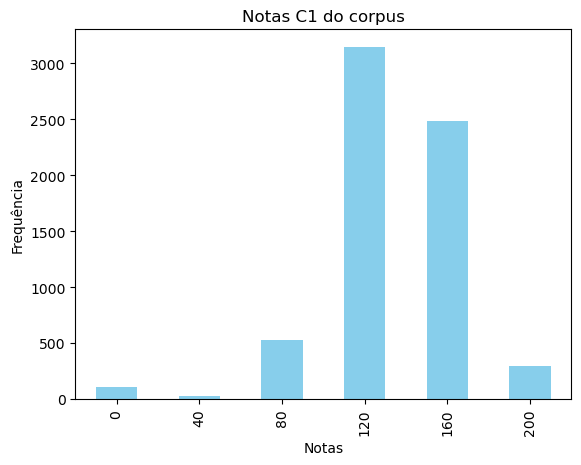

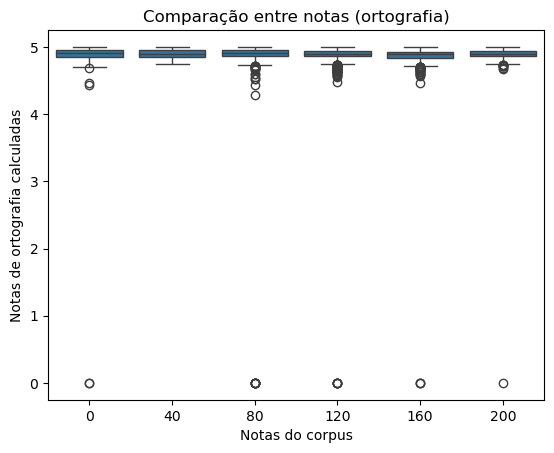

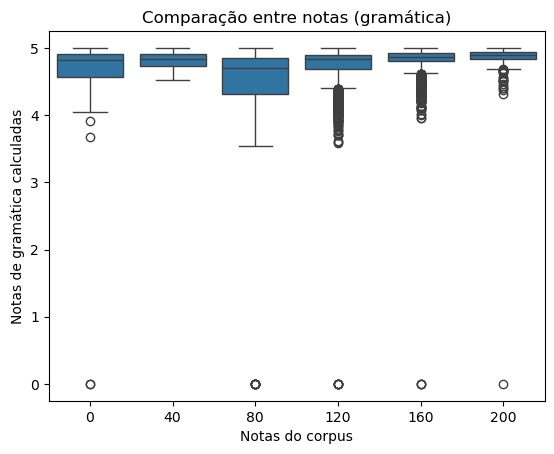

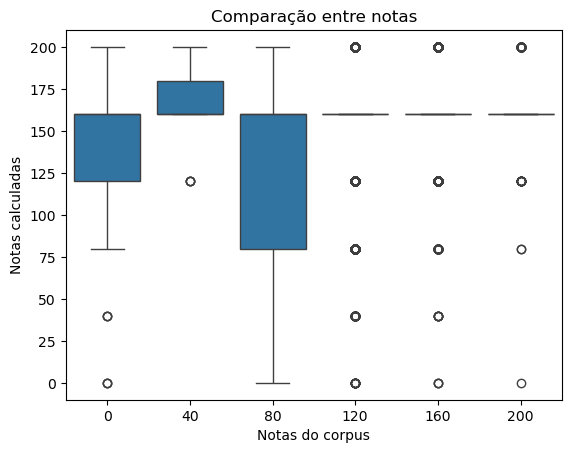

Precisao: 37.46


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_total['c1'].value_counts().sort_index().plot(kind='bar',color='skyblue')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.title('Notas C1 do corpus')
plt.show()

sns.boxplot(x='c1', y='nota_ortografia', data=dados)
plt.xlabel('Notas do corpus')
plt.ylabel('Notas de ortografia calculadas')
plt.title('Comparação entre notas (ortografia)')
plt.show()

sns.boxplot(x='c1', y='nota_gramatical', data=dados)
plt.xlabel('Notas do corpus')
plt.ylabel('Notas de gramática calculadas')
plt.title('Comparação entre notas (gramática)')
plt.show()

sns.boxplot(x='c1', y='c1_calculada', data=dados)
plt.xlabel('Notas do corpus')
plt.ylabel('Notas calculadas')
plt.title('Comparação entre notas')
plt.show()

precisao = 100 * (dados['c1'] == dados['c1_calculada']).mean()
print(f'Precisao: {precisao:.2f}')